In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [94]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('D:\CodeProject\ML\ML_Learning_Project\Kaggle\heart.csv')
print('\n\n Descriptive Statistics \n\n',data.describe().T,'\n\n')
print(data.info())

def IV_calc(data, var):
    if data[var].dtypes == 'object':
        dataf = data.groupby([var])['HeartDisease'].agg(['count','sum'])
        dataf.columns = ['Total','bad']
        dataf['good'] = dataf['Total'] - dataf['bad']
        dataf['bad_per'] = dataf['bad']/dataf['bad'].sum()
        dataf['good_per'] = dataf['good']/dataf['good'].sum()
        dataf['I_V'] = (dataf['good_per'] - dataf['bad_per'])*np.log(dataf['good_per']/dataf['bad_per'])
        return dataf
    else:
        data['bin_var'] = pd.qcut(data[var].rank(method='first'),10)
        dataf = data.groupby(['bin_var'])['HeartDisease'].agg(['count','sum'])
        dataf.columns = ['Total','bad']
        dataf['good'] = dataf['Total'] - dataf['bad']
        dataf['bad_per'] = dataf['bad']/dataf['bad'].sum()
        dataf['good_per'] = dataf['good']/dataf['good'].sum()
        dataf['I_V'] = (dataf['good_per'] - dataf['bad_per'])*np.log(dataf['good_per']/dataf['bad_per'])
        return dataf

# yi是这个分组中响应客户（即取值为1）的数量，yT是全部样本中所有响应客户（即取值为1）的数量 dataf['good_per']
# ni是这个分组中未响应客户（即取值为0）的数量，nT是全部样本中所有未响应客户（即取值为0）的数量 dataf['bad_per']
# https://www.cnblogs.com/wzdLY/p/9853209.html



 Descriptive Statistics 

               count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   R

WOE：

WOE的全称是“Weight of Evidence”，即证据权重，WOE是对原始自变量的一种编码形式。要对一个变量进行WOE编码，需要首先把这个变量进行分箱。分箱后，对于第i组，WOE的计算公式如下：

yi是这个分组中响应客户（即取值为1）的数量，yT是全部样本中所有响应客户（即取值为1）的数量

ni是这个分组中未响应客户（即取值为0）的数量，nT是全部样本中所有未响应客户（即取值为0）的数量


IV值：

IV的全称是Information Value，用来衡量自变量的预测能力

对于分组i的IV值:

计算整个变量的IV值，n为变量分组个数:

过高的IV,可能有潜在的风险
特征分箱越细,IV越高

In [95]:
discrete_columns = []
continuous_columns = []

for col in data.columns:
    if col != 'HeartDisease':
        if data[col].dtype == 'object':
            discrete_columns.append(col)
        else:
            continuous_columns.append(col)

In [96]:
print(discrete_columns)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [97]:
print(continuous_columns)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [98]:
total_columns = discrete_columns + continuous_columns
Iv_list = []
for col in total_columns:
    assigned_data = IV_calc(data=data, var=col)
    print(assigned_data)
    iv_val = round(assigned_data['I_V'].sum(),3)

    dt_type = data[col].dtypes
    Iv_list.append((iv_val, col, dt_type))
print(Iv_list)

     Total  bad  good   bad_per  good_per       I_V
Sex                                                
F      193   50   143  0.098425   0.34878  0.316736
M      725  458   267  0.901575   0.65122  0.081440
               Total  bad  good   bad_per  good_per       I_V
ChestPainType                                                
ASY              496  392   104  0.771654  0.253659  0.576294
ATA              173   24   149  0.047244  0.363415  0.645056
NAP              203   72   131  0.141732  0.319512  0.144509
TA                46   20    26  0.039370  0.063415  0.011462
            Total  bad  good   bad_per  good_per       I_V
RestingECG                                                
LVH           188  106    82  0.208661   0.20000  0.000367
Normal        552  285   267  0.561024   0.65122  0.013447
ST            178  117    61  0.230315   0.14878  0.035629
                Total  bad  good   bad_per  good_per       I_V
ExerciseAngina                                                

In [99]:
Iv_list = sorted(Iv_list, reverse=True)

for iv in Iv_list:
    print(iv[1],':',iv[0])

ST_Slope : 1.824
ChestPainType : 1.377
Oldpeak : 1.186
ExerciseAngina : 1.153
FastingBS : 0.907
MaxHR : 0.782
Cholesterol : 0.588
Sex : 0.398
Age : 0.397
RestingBP : 0.128
RestingECG : 0.049


In [100]:
dummy_sex = pd.get_dummies(data['Sex'], prefix='sex')
dummy_CPT = pd.get_dummies(data['ChestPainType'], prefix='chest_p_t')
dummy_RECG = pd.get_dummies(data['RestingECG'], prefix='rest_ecg')
dummy_angina = pd.get_dummies(data['ExerciseAngina'], prefix='angina')
dummy_STslope = pd.get_dummies(data['ST_Slope'], prefix = 'st_slope')

data_continuous = data[continuous_columns]
data_new = pd.concat([dummy_sex,dummy_CPT,dummy_RECG,dummy_angina,dummy_STslope,data_continuous, data['HeartDisease']],axis=1)
data_new

,sex_F,sex_M,chest_p_t_ASY,chest_p_t_ATA,chest_p_t_NAP,chest_p_t_TA,rest_ecg_LVH,rest_ecg_Normal,rest_ecg_ST,angina_N,...,st_slope_Down,st_slope_Flat,st_slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,40,140,289,0,172,0.0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,1,0,49,160,180,0,156,1.0,1
2,0,1,0,1,0,0,0,0,1,1,...,0,0,1,37,130,283,0,98,0.0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,48,138,214,0,108,1.5,1
4,0,1,0,0,1,0,0,1,0,1,...,0,0,1,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,...,0,1,0,45,110,264,0,132,1.2,1
914,0,1,1,0,0,0,0,1,0,1,...,0,1,0,68,144,193,1,141,3.4,1
915,0,1,1,0,0,0,0,1,0,0,...,0,1,0,57,130,131,0,115,1.2,1
916,1,0,0,1,0,0,1,0,0,1,...,0,1,0,57,130,236,0,174,0.0,1


Split data into 70% training and 30% testing with random state set to 42 to create reproducible results.

One dummy variable from each discrete column can be removed by default.

Insignificant columns can be removed if they are either insignificant or multi-collinear.

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_new.drop(['HeartDisease'],axis=1),data_new['HeartDisease'], train_size = 0.7, random_state=42)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

remove_cols_extra_dummy = ['sex_F','chest_p_t_ASY','rest_ecg_LVH','angina_N','st_slope_Down']
remove_cols_insig = []
remove_cols = list(set(remove_cols_extra_dummy+remove_cols_insig))

Summary of information relating to VIF (Variance Inflation Factors) and IV (Independent Variables)

In [102]:
import statsmodels.api as sm

logistic_model = sm.Logit(y_train, sm.add_constant(x_train.drop(remove_cols,axis=1))).fit()
print(logistic_model.summary())

# 以上为summary的结果表，其中具体的意思分别为：
# coef: 系数的估计值。
# std err: 反映了系数的精度水平。它越低，准确度就越高。
# t：t统计量的值。这是衡量系数在统计上有多重要的一种方法。
# P>|z| : 是你的假定值。p值小于0.05被认为有统计学意义。
# [0.025, 0.975]: 置信区间。
# https://www.datarobot.com/blog/ordinary-least-squares-in-python/
cnames = x_train.drop(remove_cols, axis=1).columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train.drop(remove_cols, axis=1)[yvar], sm.add_constant(x_train.drop(remove_cols, axis=1)[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif,3))

y_pred = pd.DataFrame(logistic_model.predict(sm.add_constant(x_train.drop(remove_cols, axis=1))))
y_pred.columns = ['probs']
both = pd.concat([y_train, y_pred], axis=1)

zeros = both[['HeartDisease','probs']][both['HeartDisease']==0]
ones = both[['HeartDisease','probs']][both['HeartDisease']==1]

Optimization terminated successfully.
         Current function value: 0.336117
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  642
Model:                          Logit   Df Residuals:                      626
Method:                           MLE   Df Model:                           15
Date:                Sat, 01 Jan 2022   Pseudo R-squ.:                  0.5133
Time:                        08:42:04   Log-Likelihood:                -215.79
converged:                       True   LL-Null:                       -443.35
Covariance Type:            nonrobust   LLR p-value:                 1.705e-87
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4345      1.697     -0.845      0.398      -4.761       1.892
sex_M         

Pair is concordant if probability against the 1 class is higher than the 0. Pair is discordant if probability against the 1 class is less than the 0. If both probabilities are the same, they are a tied pair.

C-Statistic indicates the performance of a model. A value >= 0.7 indicates a good model.

In [103]:
def df_crossjoin(df1,df2,**kwargs):
    df1['_tmpkey'] = 1
    df2['_tmpkey'] = 1
    res = pd.merge(df1,df2,on='_tmpkey',**kwargs).drop('_tmpkey',axis=1)
    res.index = pd.MultiIndex.from_product((df1.index, df2.index))
    df1.drop('_tmpkey',axis=1,inplace=True)
    df2.drop('_tmpkey', axis=1, inplace=True)
    return res

joined_data = df_crossjoin(ones, zeros)
joined_data['concordant_pair'] = 0
joined_data.loc[joined_data['probs_x']>joined_data['probs_y'],'concordant_pair'] = 1
joined_data['discordant_pair'] = 0
joined_data.loc[joined_data['probs_x']<joined_data['probs_y'],'discordant_pair'] = 1
joined_data['tied_pair'] = 0
joined_data.loc[joined_data['probs_x']==joined_data['probs_y'],'tied_pair'] = 1

p_conc = (sum(joined_data['concordant_pair'])*1)/(joined_data.shape[0])
p_disc = (sum(joined_data['discordant_pair'])*1)/(joined_data.shape[0])
c_statistic = 0.5 + (p_conc-p_disc)/2

print(c_statistic)

0.9279889183705322


AUC is 0.93 indicating an excellent ability to diagnose patients with and without Heart Disease.

A threshold probability between classes is optimal at 0.5 producing the following test results:

Test Accuracy: 0.88

Precision: 0.917

Recall: 0.878

F1 Score:0.897

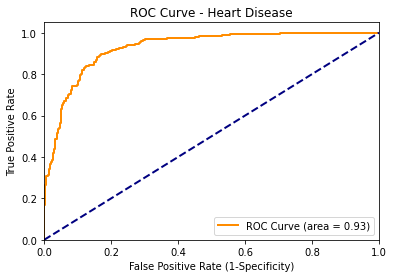

Threshold: 0.0 Train Accuracy: 0.5358
Threshold: 0.1 Train Accuracy: 0.7741
Threshold: 0.2 Train Accuracy: 0.8333
Threshold: 0.3 Train Accuracy: 0.852
Threshold: 0.4 Train Accuracy: 0.8567
Threshold: 0.5 Train Accuracy: 0.8614
Threshold: 0.6 Train Accuracy: 0.8489
Threshold: 0.7 Train Accuracy: 0.8411
Threshold: 0.8 Train Accuracy: 0.7991
Threshold: 0.9 Train Accuracy: 0.7165


Train Confusion Matrix Predicted    0    1
Actual             
0          248   50
1           39  305


Test Confusion Matrix 
 Predicted   0    1
Actual            
0          99   13
1          20  144


Test Accuracy: 0.8804
Precision: 0.917
Recall: 0.878
F1 Score: 0.897


In [104]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score

fpr, tpr, thresholds = metrics.roc_curve(both['HeartDisease'],both['probs'], pos_label = 1)
roc_auc = auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heart Disease')
plt.legend(loc='lower right')
plt.show()

for i in list(np.arange(0,1,0.1)):
    both['y_pred'] = 0
    both.loc[both['probs']>i,'y_pred'] = 1
    print('Threshold:',round(i,2),'Train Accuracy:',round(accuracy_score(both['HeartDisease'],both['y_pred']),4))

both['y_pred'] = 0
both.loc[both['probs']>0.5,'y_pred'] = 1
print('\n\nTrain Confusion Matrix', pd.crosstab(both['HeartDisease'],both['y_pred'],rownames = ['Actual'], colnames = ['Predicted']))

y_pred_test = pd.DataFrame(logistic_model.predict(sm.add_constant(x_test.drop(remove_cols,axis=1))))
y_pred_test.columns = ['probs']
both_test = pd.concat([y_test,y_pred_test],axis=1)
both_test['y_pred'] = 0
both_test.loc[both_test['probs']>0.5, 'y_pred'] = 1

test_crosstab = pd.crosstab(both_test['HeartDisease'],both_test['y_pred'],rownames = ['Actual'], colnames = ['Predicted'])
precision = round(test_crosstab[1][1] / (test_crosstab[1][1] + test_crosstab[1][0]),3)
recall =round(test_crosstab[1][1] / (test_crosstab[1][1] + test_crosstab[0][1]),3)
f_score = round(2*(precision*recall)/(precision+recall),3)


print('\n\nTest Confusion Matrix \n', test_crosstab)
print('\n\nTest Accuracy:', round(accuracy_score(both_test['HeartDisease'],both_test['y_pred']),4))
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:', f_score)